#### 迷你案例：用PCA做噪音过滤

降维的目的之一就是希望抛弃掉对模型带来负面影响的特征，而我们相信，带有效信息的特征的方差应该是远大于
噪音的，所以相比噪音，有效的特征所带的信息应该不会在PCA过程中被大量抛弃。inverse_transform能够在不
恢复原始数据的情况下，将降维后的数据返回到原本的高维空间，即是说能够实现”保证维度，但去掉方差很小特
征所带的信息“。利用inverse_transform的这个性质，我们能够实现噪音过滤。

(1797, 64)


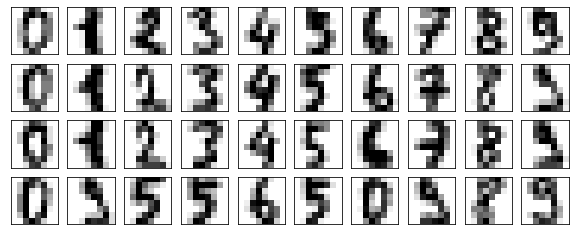

In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import numpy as np

digits = load_digits()
print(digits.data.shape)

def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize=(10,4)
                           ,subplot_kw = {"xticks":[],"yticks":[]})
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")

#可视化
plot_digits(digits.data)

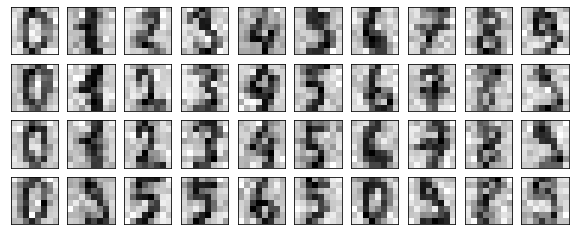

In [3]:
#加入噪声
rng = np.random.RandomState(42)
#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = rng.normal(digits.data,2)
plot_digits(noisy)

(1797, 6)


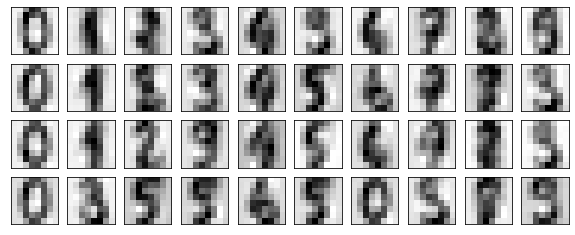

In [4]:
#过滤噪声
pca = PCA(0.5,svd_solver="full").fit(noisy)
X_dr = pca.transform(noisy)
print(X_dr.shape)

without_noise = pca.inverse_transform(X_dr)
print(without_noise.shape)
plot_digits(without_noise)